In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install missingno
import missingno as mn
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve, classification_report

In [4]:
df_application_data = pd.read_csv('/content/drive/MyDrive/In Comm/Dataset/application_data.csv')
df_prev_application_data = pd.read_csv('/content/drive/MyDrive/In Comm/Dataset/previous_application.csv')

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

# **Reading and understanding the datsets**

In [6]:
df_application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
df_prev_application_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Let's view the shap to understand the dimentntions of both datasets

In [8]:
print("df_application_data shape: ",df_application_data.shape)
print("df_application_data shape: ",df_prev_application_data.shape)

df_application_data shape:  (307511, 122)
df_application_data shape:  (1670214, 37)


Based on the datasets heads and shape, i will process each one seprately as both have different features.

Now let's view the datasets' infos to understand the range of datatypes and the popularity of null values.

In [9]:
print("df_application_data info: ")
df_application_data.info(verbose=True)

df_application_data info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH         

In [10]:
print("df_application_data info: ")
df_prev_application_data.info()

df_application_data info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYME

It seems like previous applications dataset has many null values that needs to be dealt with, let's see if that is the case with applications dataset.

In [11]:
df_application_data.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,12


<Axes: >

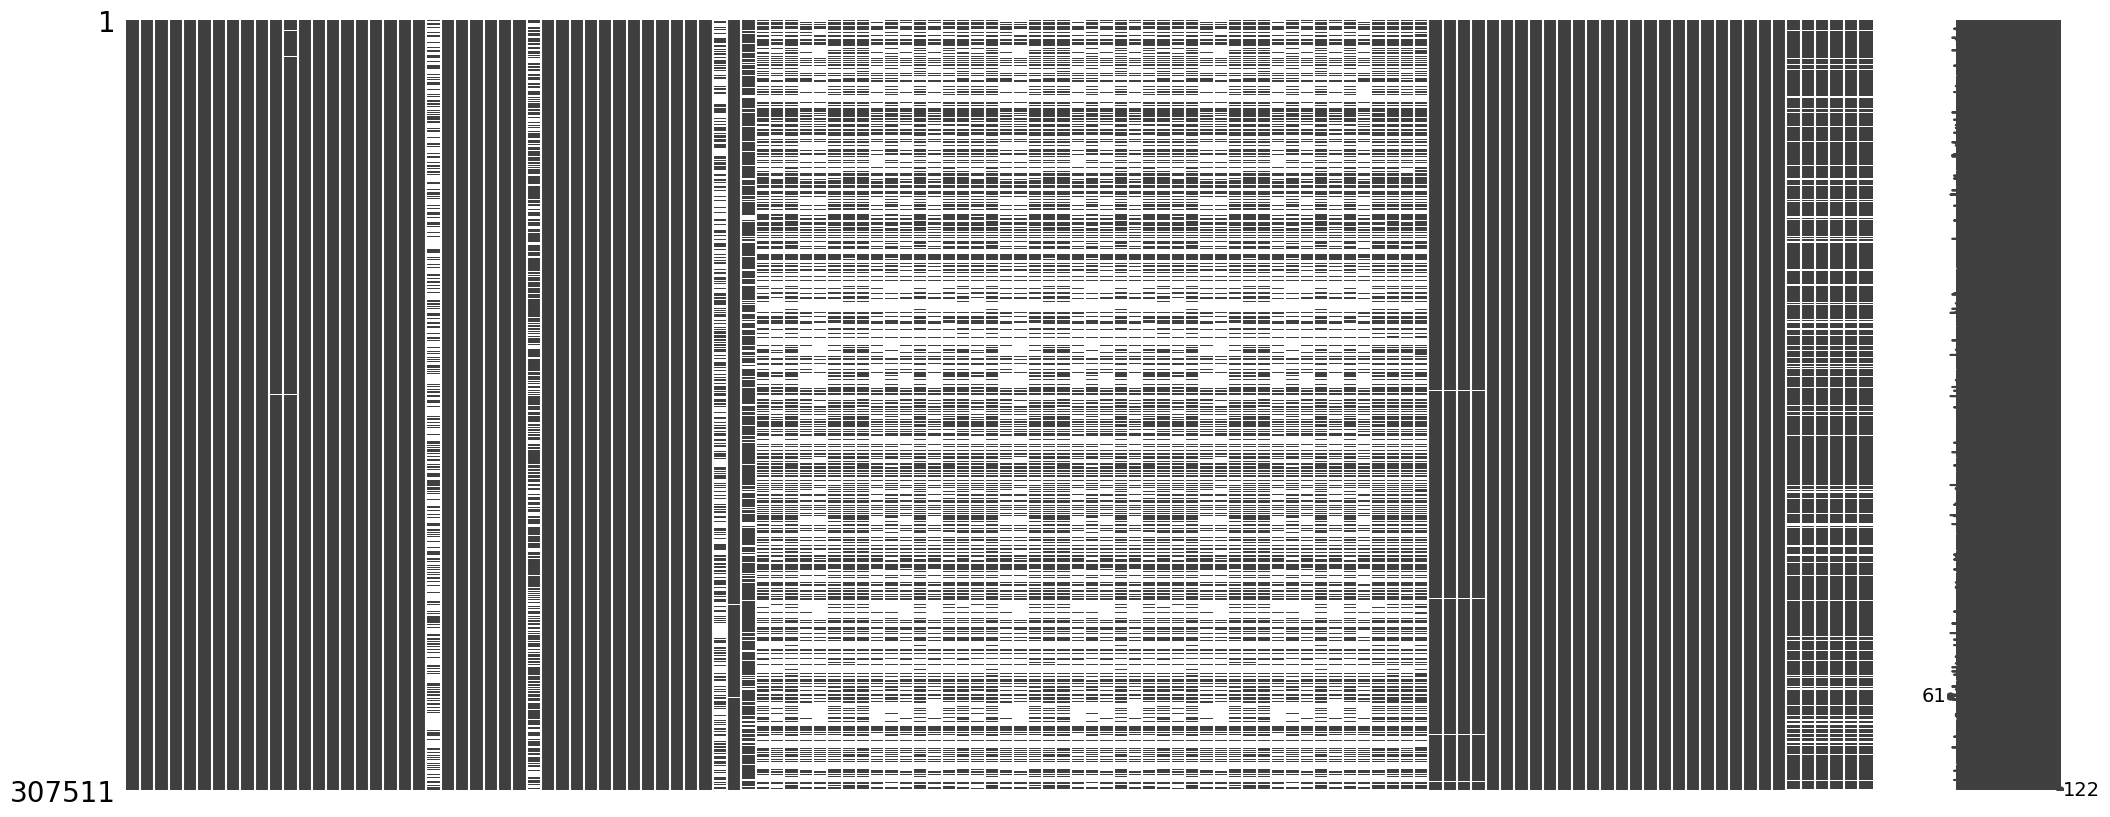

In [12]:
mn.matrix(df_application_data)

<Axes: >

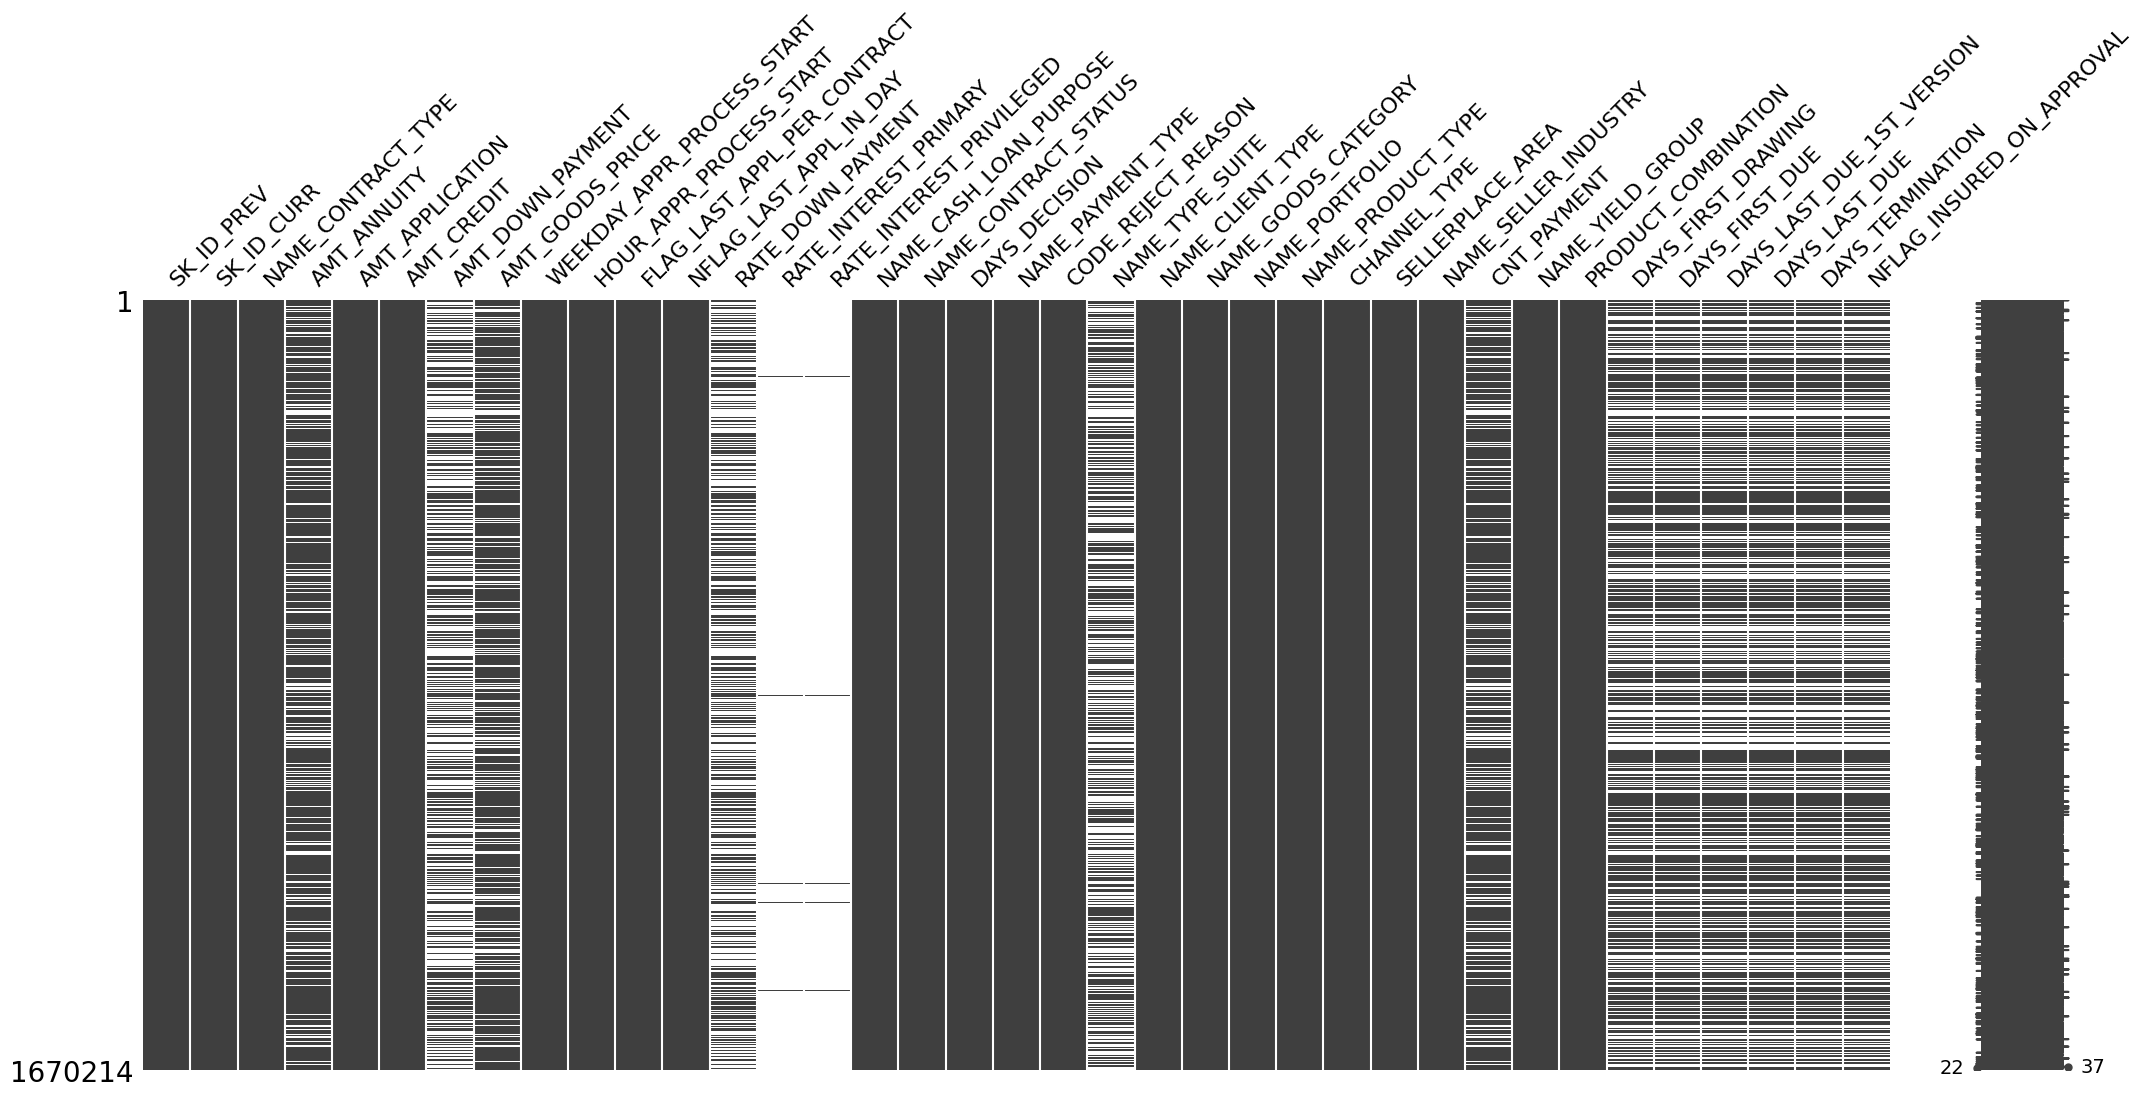

In [13]:
mn.matrix(df_prev_application_data)

It seems like application datset sufferes from many inputs missing as well.
Next, let's understand the data distribution in both datasets.

In [14]:
df_application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [15]:
df_prev_application_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# Data cleaning and prepration

Let's calculate the percentage of null values in each dataset

In [16]:
round(df_application_data.isnull().sum() / df_application_data.shape[0] * 100.00,2)

,0
SK_ID_CURR,0.00
TARGET,0.00
NAME_CONTRACT_TYPE,0.00
CODE_GENDER,0.00
FLAG_OWN_CAR,0.00
FLAG_OWN_REALTY,0.00
CNT_CHILDREN,0.00
AMT_INCOME_TOTAL,0.00
AMT_CREDIT,0.00
AMT_ANNUITY,0.00


It seems like in applications data there are many columns that has over 40% of null values, let's filter these columns out.

In [44]:
df_application_data_filtered = df_application_data.loc[:,df_application_data.isnull().sum() / df_application_data.shape[0] < 0.40]
df_application_data_filtered.shape

(307511, 73)

In [18]:
round(df_application_data_filtered.isnull().sum() / df_application_data_filtered.shape[0] * 100.00,2)

,0
SK_ID_CURR,0.00
TARGET,0.00
NAME_CONTRACT_TYPE,0.00
CODE_GENDER,0.00
FLAG_OWN_CAR,0.00
FLAG_OWN_REALTY,0.00
CNT_CHILDREN,0.00
AMT_INCOME_TOTAL,0.00
AMT_CREDIT,0.00
AMT_ANNUITY,0.00


It seems like `NAME_TYPE_SUITE` hasn't been droped and it has 42% null values so let's drop it.

In [19]:
df_application_data_filtered.drop('NAME_TYPE_SUITE',axis=1,inplace=True)

<ipython-input-19-3eed2fbfd40f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_application_data_filtered.drop('NAME_TYPE_SUITE',axis=1,inplace=True)


In [20]:
round(df_application_data_filtered.isnull().sum() / df_application_data_filtered.shape[0] * 100.00,2)

,0
SK_ID_CURR,0.00
TARGET,0.00
NAME_CONTRACT_TYPE,0.00
CODE_GENDER,0.00
FLAG_OWN_CAR,0.00
FLAG_OWN_REALTY,0.00
CNT_CHILDREN,0.00
AMT_INCOME_TOTAL,0.00
AMT_CREDIT,0.00
AMT_ANNUITY,0.00


Now let's perform the same for previous applications dataset

In [21]:
round(df_prev_application_data.isnull().sum() / df_prev_application_data.shape[0] * 100.00,2)

,0
SK_ID_PREV,0.00
SK_ID_CURR,0.00
NAME_CONTRACT_TYPE,0.00
AMT_ANNUITY,22.29
AMT_APPLICATION,0.00
AMT_CREDIT,0.00
AMT_DOWN_PAYMENT,53.64
AMT_GOODS_PRICE,23.08
WEEKDAY_APPR_PROCESS_START,0.00
HOUR_APPR_PROCESS_START,0.00


It seem like it is the same senario in previous applications dataset as well, let's filter any columns with over 40% of null values.

In [22]:
df_prev_application_data_filtered = df_prev_application_data.loc[:,df_prev_application_data.isnull().sum() / df_prev_application_data.shape[0] < 0.40]
df_prev_application_data_filtered.shape

(1670214, 26)

In [23]:
round(df_prev_application_data_filtered.isnull().sum() / df_prev_application_data_filtered.shape[0] * 100.00,2)

,0
SK_ID_PREV,0.00
SK_ID_CURR,0.00
NAME_CONTRACT_TYPE,0.00
AMT_ANNUITY,22.29
AMT_APPLICATION,0.00
AMT_CREDIT,0.00
AMT_GOODS_PRICE,23.08
WEEKDAY_APPR_PROCESS_START,0.00
HOUR_APPR_PROCESS_START,0.00
FLAG_LAST_APPL_PER_CONTRACT,0.00


in applications file

### Removing unnecessary columns from applications dataset (original)

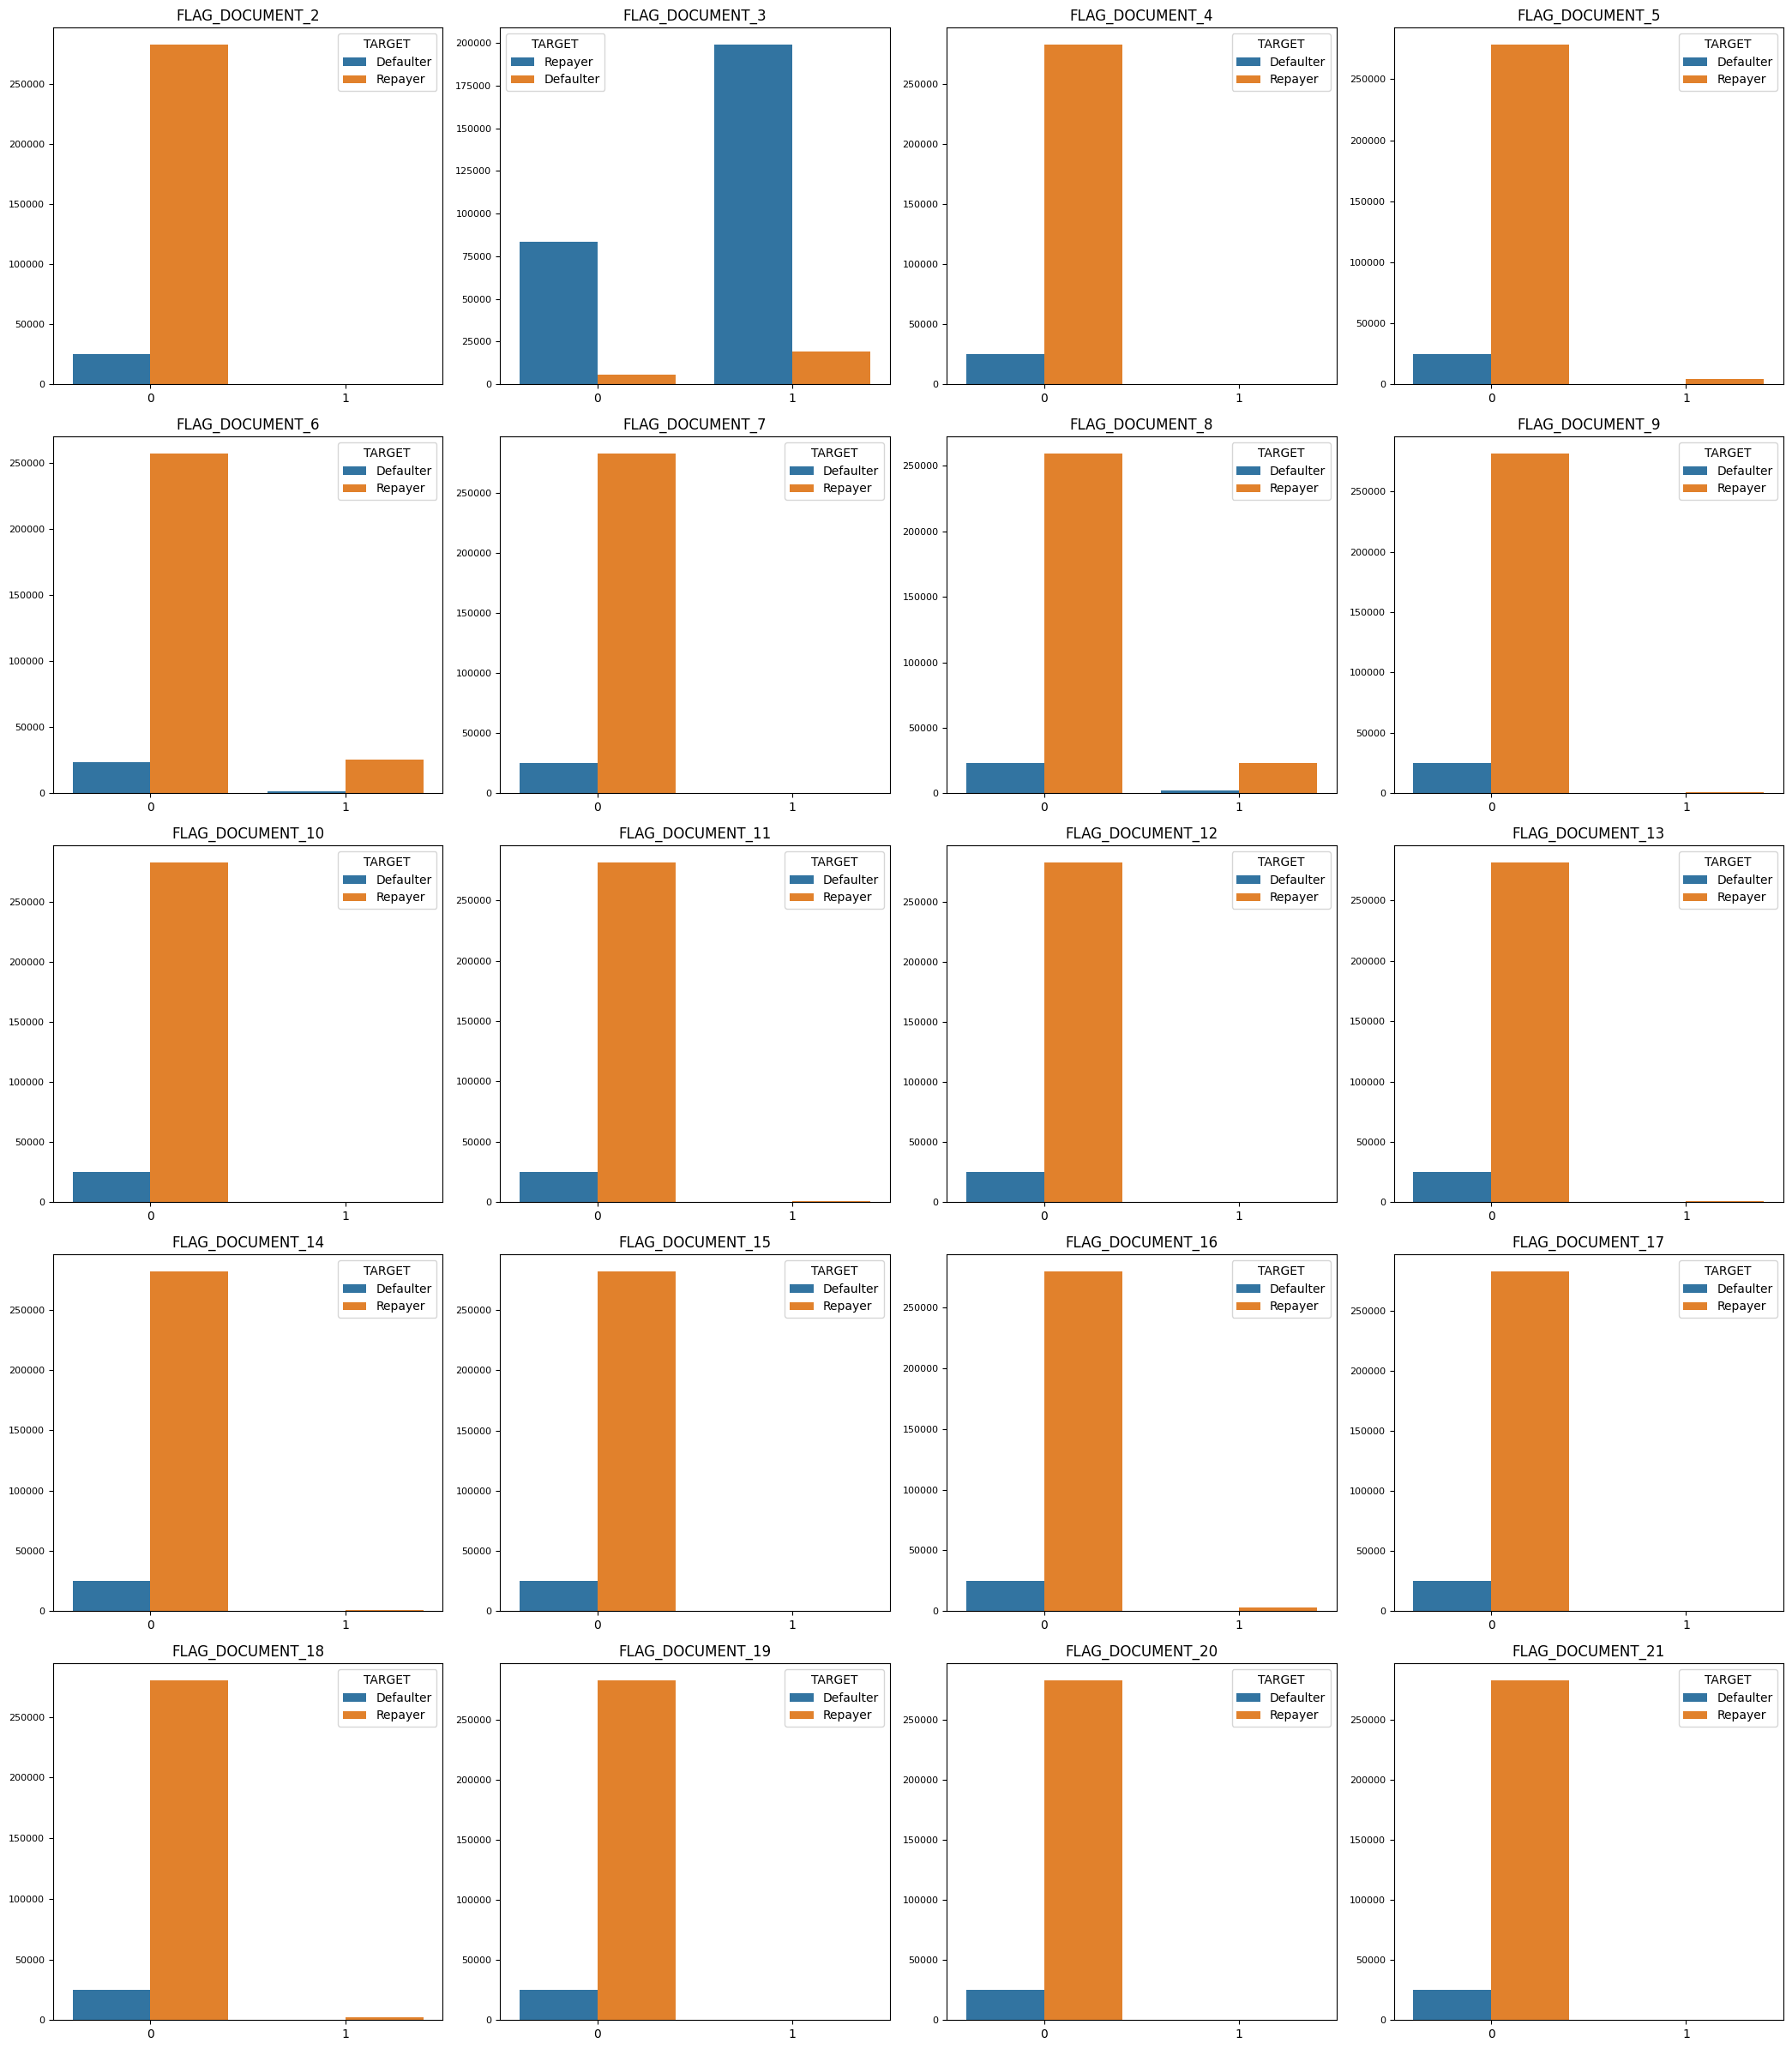

In [34]:
df_application_data_filtered_docs = df_application_data_filtered.copy()
df_application_data_filtered_docs["TARGET"] = df_application_data_filtered_docs["TARGET"].replace({1: "Defaulter", 0: "Repayer"})

fig, axes = plt.subplots(5, 4, figsize=(21, 24))
axes = axes.flatten()

docs_columns = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

for idx, col in enumerate(docs_columns):
    sns.countplot(data=df_application_data_filtered_docs, x=col, hue="TARGET", ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("")
    axes[idx].tick_params(axis="y", labelsize=8)

for ax in axes[len(docs_columns):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

From above, it seems like most applicants didn't submit these documents excpet for FLAG_DOCUMENT_3 which will be the only column I will keep

In [45]:
df_application_data_filtered.drop(docs_columns,axis=1,inplace=True)
df_application_data_filtered.shape

<ipython-input-45-7077684ae80b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_application_data_filtered.drop(docs_columns,axis=1,inplace=True)


(307511, 53)

In [36]:
df_application_data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

Brilliant, let's now clean the application dataset even more from unnecesary data. Now, let's check for the correlation between contact details and target.

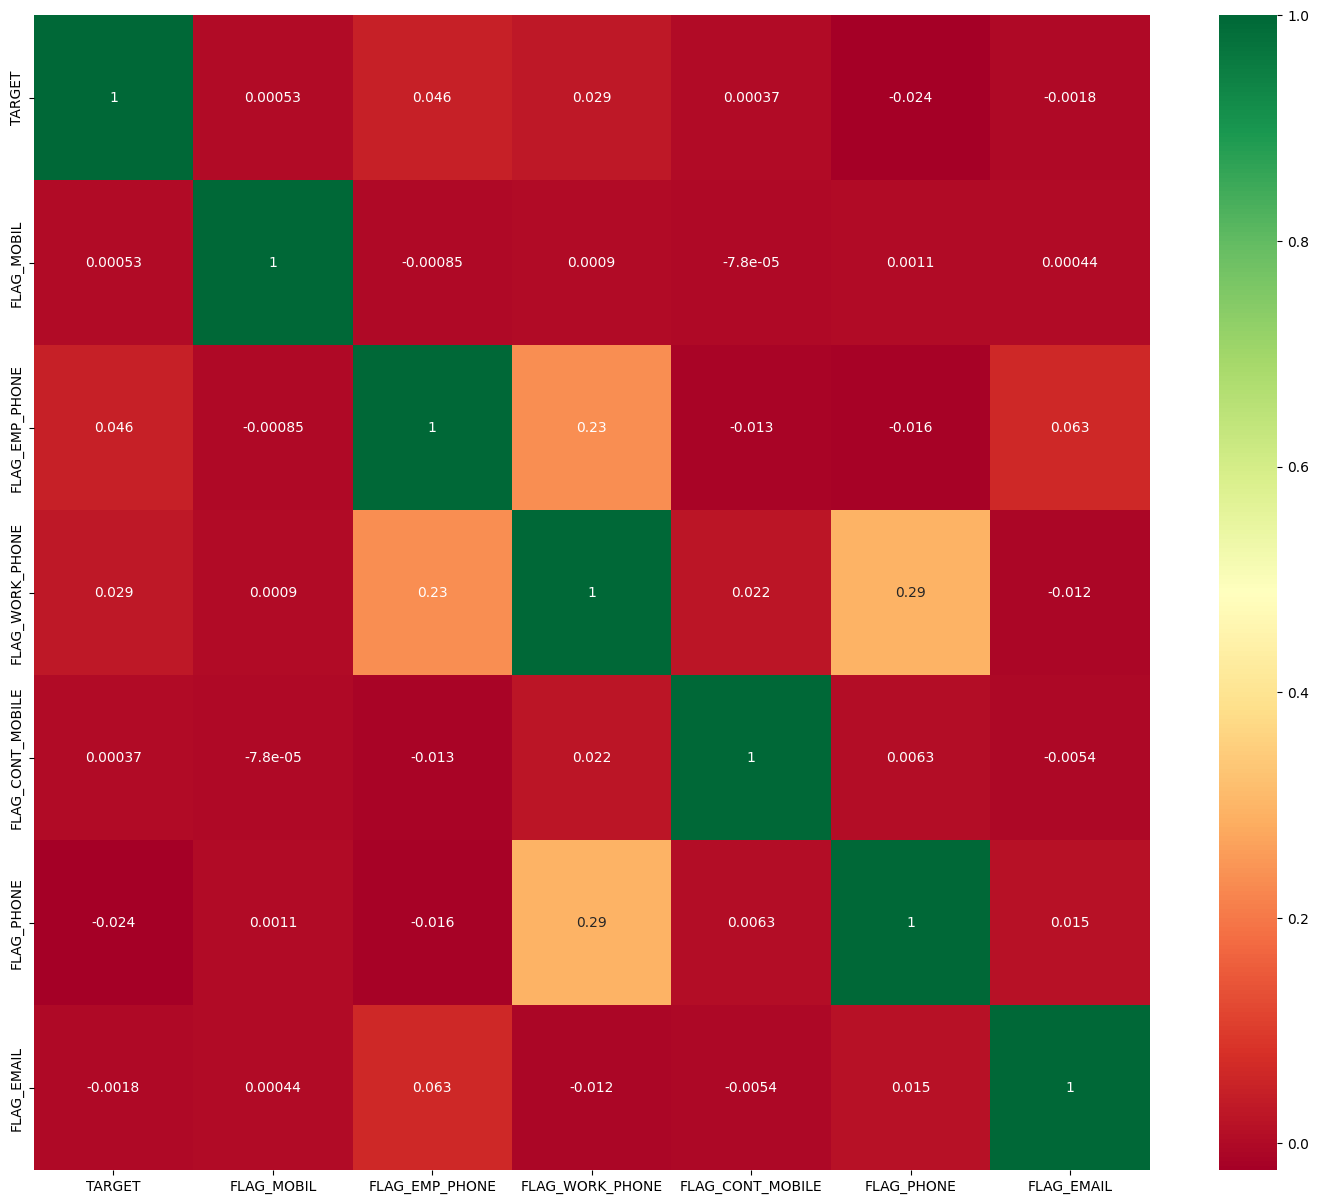

In [41]:
plt.figure(figsize=(18, 15))

contact_flags = ['TARGET','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']

source_corr = df_application_data_filtered[contact_flags].corr()

ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

as expected these columns are not influential so we are going to drop them.

In [46]:
df_application_data_filtered.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'],axis=1,inplace=True)
df_application_data_filtered.shape

<ipython-input-46-648804a1e744>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_application_data_filtered.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'],axis=1,inplace=True)


(307511, 47)

In [48]:
df_application_data_filtered.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       

In [32]:
df_application_data_filtered.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Defaulter,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Repayer,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Repayer,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Repayer,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Repayer,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


now let's check for social cirles

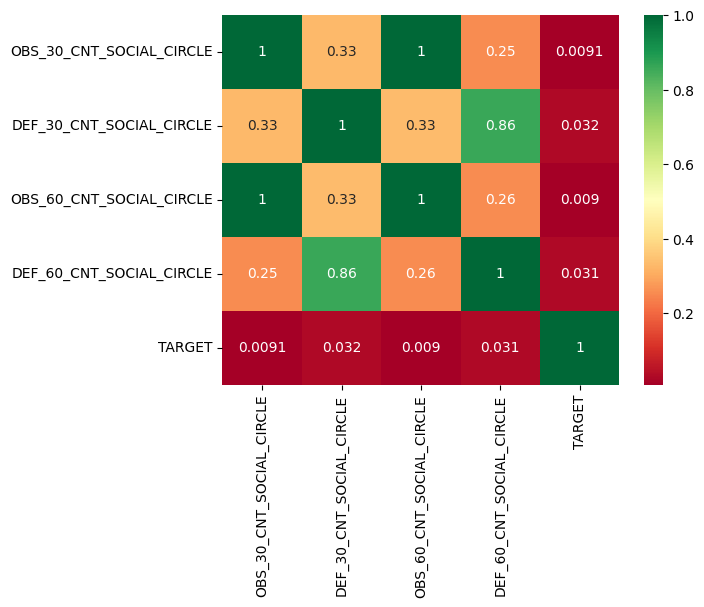

In [50]:
social_circle = [
    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'TARGET'
]
source_corr = df_application_data_filtered[social_circle].corr()

ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

As we can see here, there is such a low correlation between these columns and the target. So let's remove them.

In [52]:
social_circle.remove("TARGET")
df_application_data_filtered.drop(social_circle,axis=1,inplace=True)
df_application_data_filtered.shape

<ipython-input-52-dfe118d641bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_application_data_filtered.drop(social_circle,axis=1,inplace=True)


(307511, 43)

In [53]:
df_application_data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

Now that we reduced the dataset to 42 columns, let's shift our focus to reduce the previous applications dataset

### Removing unnecssay columns from applications dataset

Looking at the previous applications dataset, we can see a set of columns that are not needed like `WEEKDAY_APPR_PROCESS_START`,`HOUR_APPR_PROCESS_START`,
                        `FLAG_LAST_APPL_PER_CONTRACT`,and `NFLAG_LAST_APPL_IN_DAY`so it make sense to drop them.

In [57]:
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
df_prev_application_data_filtered.drop(Unnecessary_previous,axis=1,inplace=True)
df_prev_application_data_filtered.shape

<ipython-input-57-5fc917084533>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prev_application_data_filtered.drop(Unnecessary_previous,axis=1,inplace=True)


(1670214, 22)

As we can see we, we were successful reducing the columns in previous applications from 37 columns to 22 relevant columns.

### Data amputation for application dataset (Original)
I will start by assigning "unknown" for all categorical empty values. I want to do that rather than assigning it to the most popular value to avoid influencing the model in a certain direction.


In [82]:
# Define the social flags columns
categorical = [
    'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
]

# Replace NaN values in these columns with "unknown"
df_application_data_filtered[categorical] = df_application_data_filtered[categorical].fillna("unknown")


<ipython-input-82-dc334aac8b04>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_application_data_filtered[categorical] = df_application_data_filtered[categorical].fillna("unknown")


In [83]:
df_application_data_filtered.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


Then I will assign the average for every empty value in `AMT_ANNUITY`, `AMT_GOODS_PRICE`, `EXT_SOURCE_2` and `EXT_SOURCE_2`

In [85]:
columns_with_mean_fill = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

df_application_data_filtered[columns_with_mean_fill] = df_application_data_filtered[columns_with_mean_fill].fillna(df_application_data_filtered[columns_with_mean_fill].mean())


<ipython-input-85-4a255fce9fa8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_application_data_filtered[columns_with_mean_fill] = df_application_data_filtered[columns_with_mean_fill].fillna(df_application_data_filtered[columns_with_mean_fill].mean())


In [86]:
df_application_data_filtered.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0


Now we are left with `AMT_REQ_CREDIT_BUREAU_HOUR`, `AMT_REQ_CREDIT_BUREAU_DAY`, `AMT_REQ_CREDIT_BUREAU_WEEK`, `AMT_REQ_CREDIT_BUREAU_MON`, `AMT_REQ_CREDIT_BUREAU_QRT` and `AMT_REQ_CREDIT_BUREAU_YEAR`, as these are counts let's view the distribution of values to deside between replacing the empty values with the median or flooring the mean.

In [87]:
bureau_columns = [
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]

for col in bureau_columns:
    print(f"Value counts for {col}:\n{df_application_data_filtered[col].value_counts(dropna=False)}\n")


Value counts for AMT_REQ_CREDIT_BUREAU_HOUR:
AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
NaN     41519
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64

Value counts for AMT_REQ_CREDIT_BUREAU_DAY:
AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
NaN     41519
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64

Value counts for AMT_REQ_CREDIT_BUREAU_WEEK:
AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
NaN     41519
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64

Value counts for AMT_REQ_CREDIT_BUREAU_MON:
AMT_REQ_CREDIT_BUREAU_MON
0.0     222233
NaN      41519
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
1

As the data seems to be distributed towards the lower end, using the median will not be the best representation of the data distribution.

In [89]:
for col in bureau_columns:
    mean_floored = np.floor(df_application_data_filtered[col].mean())
    df_application_data_filtered[col].fillna(mean_floored, inplace=True)

<ipython-input-89-3bfb0a696f1a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_application_data_filtered[col].fillna(mean_floored, inplace=True)
<ipython-input-89-3bfb0a696f1a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_application_data_filtered[col].fillna(mean_floored, inplace=True)


In [90]:
for col in bureau_columns:
    print(f"Value counts for {col}:\n{df_application_data_filtered[col].value_counts(dropna=False)}\n")


Value counts for AMT_REQ_CREDIT_BUREAU_HOUR:
AMT_REQ_CREDIT_BUREAU_HOUR
0.0    305885
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64

Value counts for AMT_REQ_CREDIT_BUREAU_DAY:
AMT_REQ_CREDIT_BUREAU_DAY
0.0    306022
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64

Value counts for AMT_REQ_CREDIT_BUREAU_WEEK:
AMT_REQ_CREDIT_BUREAU_WEEK
0.0    298975
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64

Value counts for AMT_REQ_CREDIT_BUREAU_MON:
AMT_REQ_CREDIT_BUREAU_MON
0.0     263752
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         

In [91]:
df_application_data_filtered.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0


Finally now that we have a couple of null values I will just drop these records

In [92]:
df_application_data_filtered.dropna(inplace=True)

<ipython-input-92-a0ec49366d8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_application_data_filtered.dropna(inplace=True)


In [93]:
df_application_data_filtered.isnull().info()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0


In [ ]:
columns_to_normalize = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

In [94]:
df_application_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307508 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307508 non-null  int64  
 1   TARGET                       307508 non-null  int64  
 2   NAME_CONTRACT_TYPE           307508 non-null  object 
 3   CODE_GENDER                  307508 non-null  object 
 4   FLAG_OWN_CAR                 307508 non-null  object 
 5   FLAG_OWN_REALTY              307508 non-null  object 
 6   CNT_CHILDREN                 307508 non-null  int64  
 7   AMT_INCOME_TOTAL             307508 non-null  float64
 8   AMT_CREDIT                   307508 non-null  float64
 9   AMT_ANNUITY                  307508 non-null  float64
 10  AMT_GOODS_PRICE              307508 non-null  float64
 11  NAME_TYPE_SUITE              307508 non-null  object 
 12  NAME_INCOME_TYPE             307508 non-null  object 
 13  NAME

Now let's save the cleanded dataset

In [1]:
df_application_data_filtered.to_csv('/content/drive/MyDrive/In Comm/Dataset/applications_cleaned.csv', index=False)


NameError: name 'df_application_data_filtered' is not defined

In [9]:
applications_cleaned = pd.read_csv('applications_cleaned.csv')

# EDA
And I will start by segmenting some of the numerical values into groups to make it easier to visualize and understand.

In [11]:
# Convert DAYS_BIRTH and DAYS_EMPLOYED from days to years
applications_cleaned['AGE_YEARS'] = (-applications_cleaned['DAYS_BIRTH'] / 365).astype(int)
applications_cleaned['YEARS_EMPLOYED'] = np.where(applications_cleaned['DAYS_EMPLOYED'] < 0, (-applications_cleaned['DAYS_EMPLOYED'] / 365).astype(int), 0)

# Define bins for age groups, income, credit, and annuity
age_bins = [0, 25, 35, 45, 55, 65, 75, 100]
income_bins = [0, 50000, 100000, 150000, 200000, 300000, 500000, np.inf]
credit_bins = [0, 100000, 300000, 500000, 1000000, 1500000, 2000000, np.inf]
annuity_bins = [0, 5000, 10000, 20000, 30000, 40000, 50000, np.inf]

# Segment the data into categories
applications_cleaned['AGE_GROUP'] = pd.cut(applications_cleaned['AGE_YEARS'], bins=age_bins, labels=['<25', '25-35', '35-45', '45-55', '55-65', '65-75', '75+'])
applications_cleaned['INCOME_GROUP'] = pd.cut(applications_cleaned['AMT_INCOME_TOTAL'], bins=income_bins, labels=['<50K', '50K-100K', '100K-150K', '150K-200K', '200K-300K', '300K-500K', '500K+'])
applications_cleaned['CREDIT_GROUP'] = pd.cut(applications_cleaned['AMT_CREDIT'], bins=credit_bins, labels=['<100K', '100K-300K', '300K-500K', '500K-1M', '1M-1.5M', '1.5M-2M', '2M+'])
applications_cleaned['ANNUITY_GROUP'] = pd.cut(applications_cleaned['AMT_ANNUITY'], bins=annuity_bins, labels=['<5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-50K', '50K+'])

## Univariate analysis

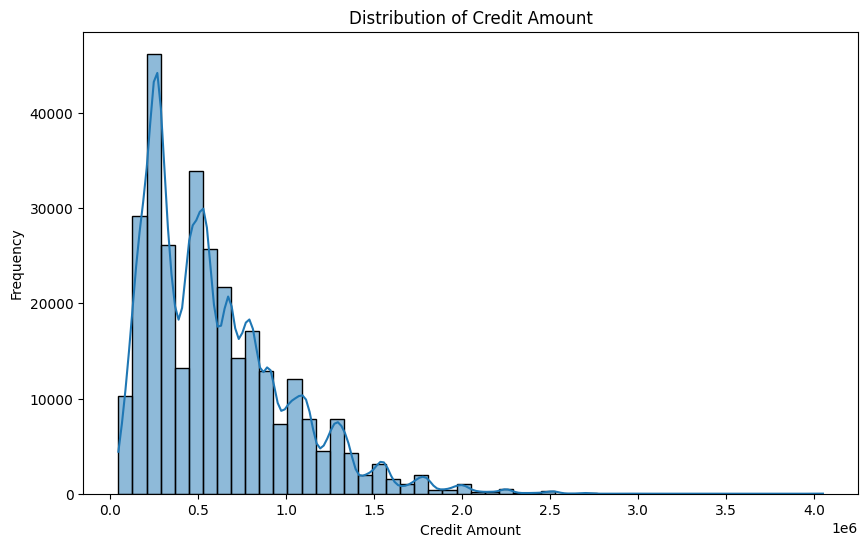

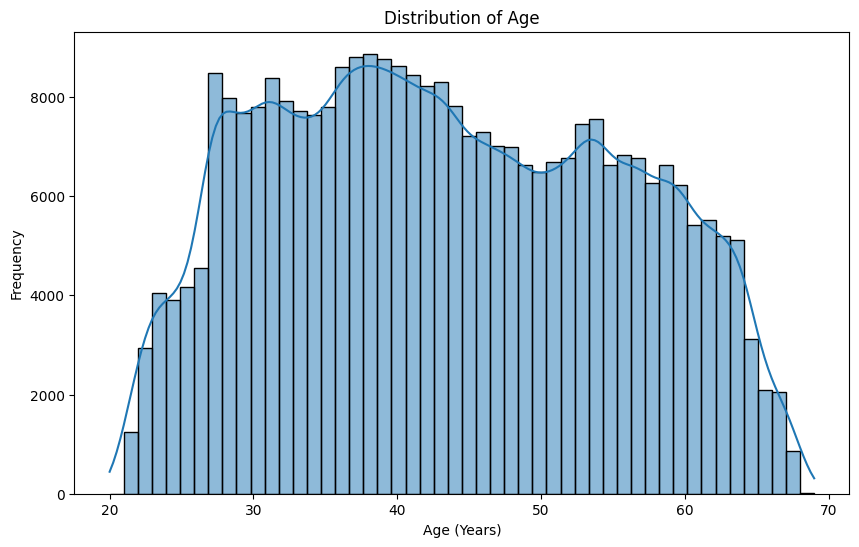

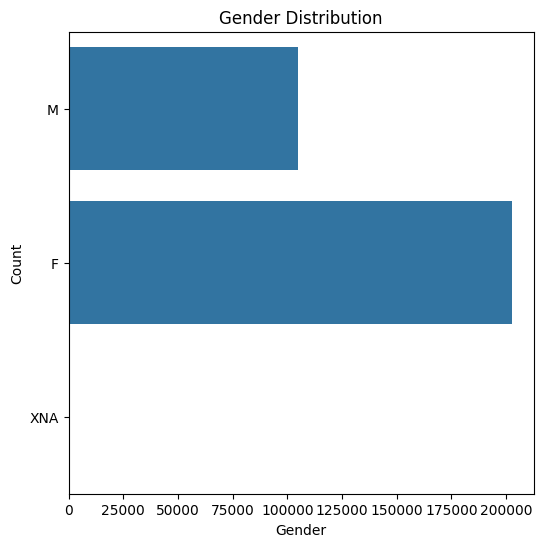

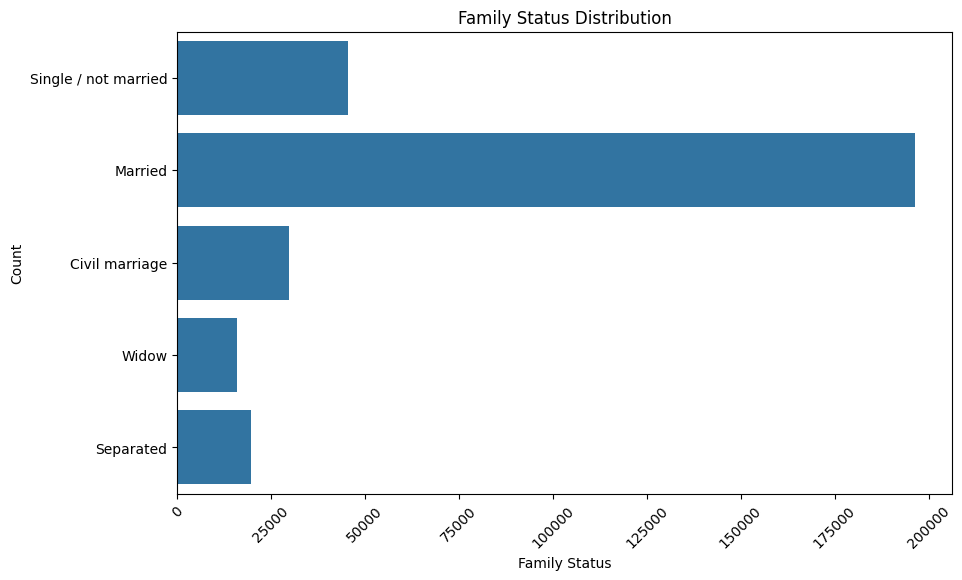

In [5]:
# 1. Distribution of AMT_CREDIT
plt.figure(figsize=(10, 6))
sns.histplot(applications_cleaned['AMT_CREDIT'], bins=50, kde=True)
plt.title('Distribution of Credit Amount')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.show()

# 2. Distribution of Age (converted from DAYS_BIRTH to years)
plt.figure(figsize=(10, 6))
sns.histplot(applications_cleaned['AGE_YEARS'], bins=50, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

# 3. Gender Distribution
plt.figure(figsize=(6, 6))
sns.countplot(applications_cleaned['CODE_GENDER'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 4. Family Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(applications_cleaned['NAME_FAMILY_STATUS'])
plt.title('Family Status Distribution')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Multivariate analysis

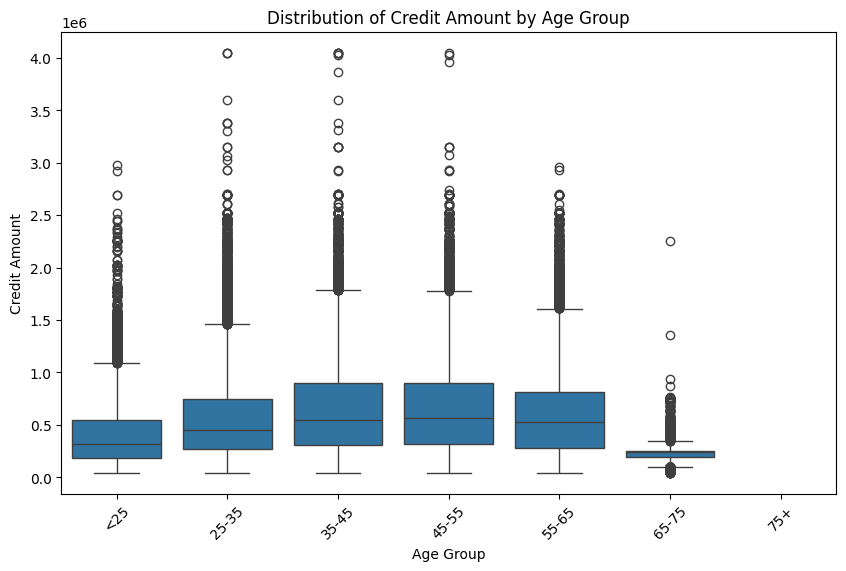

<ipython-input-6-83c2ea948d58>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_years_employed = applications_cleaned.groupby('AGE_GROUP')['YEARS_EMPLOYED'].mean().reset_index()


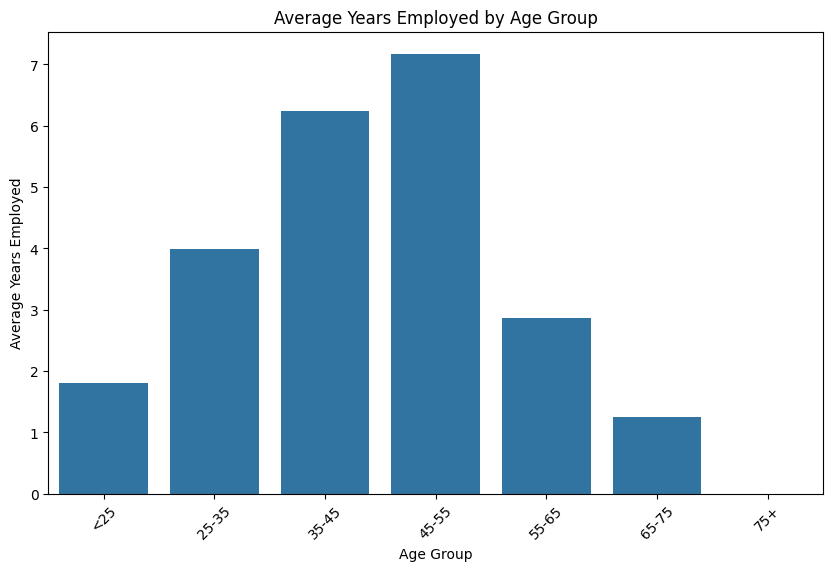

<ipython-input-6-83c2ea948d58>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_target = applications_cleaned.groupby('AGE_GROUP')['TARGET'].mean().reset_index()


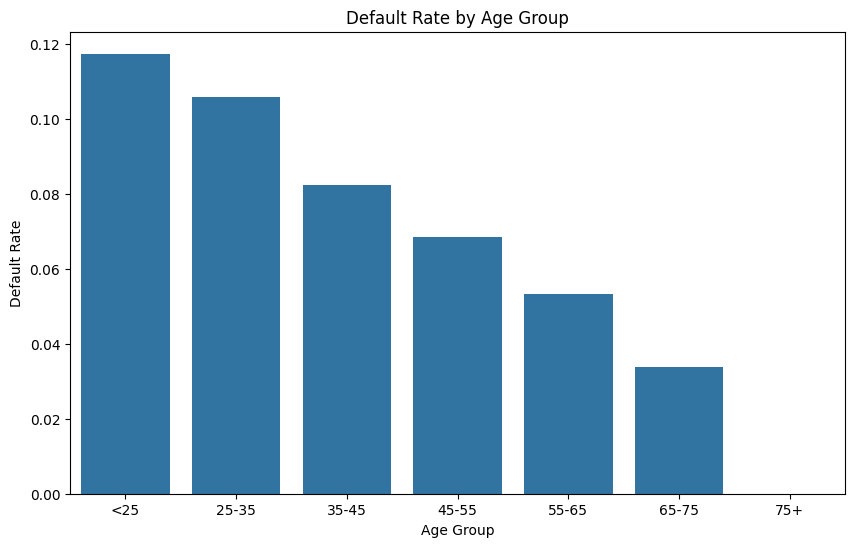

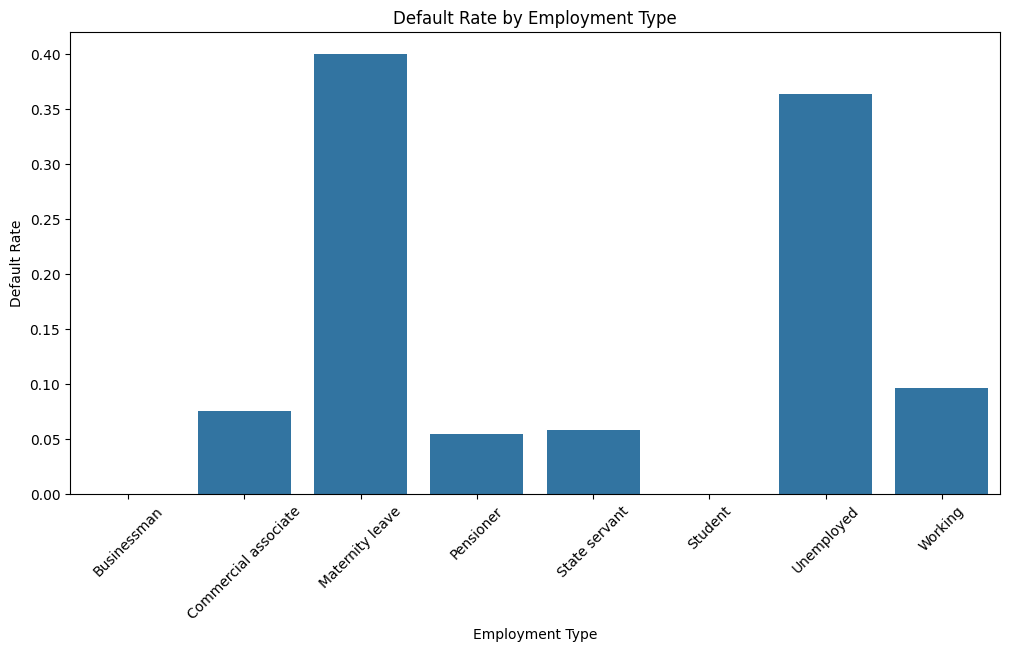

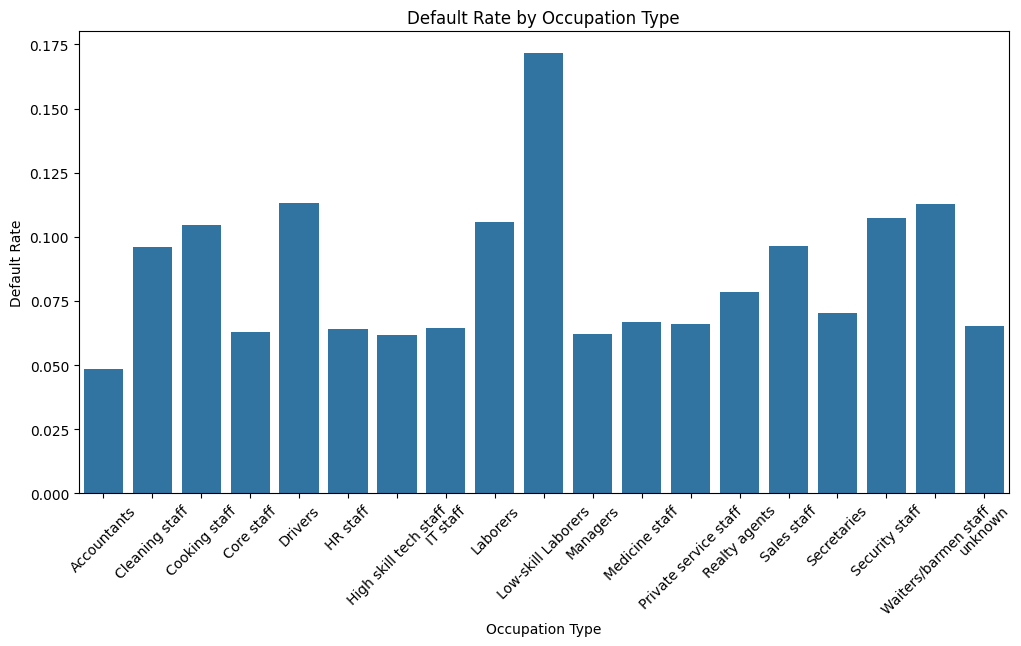

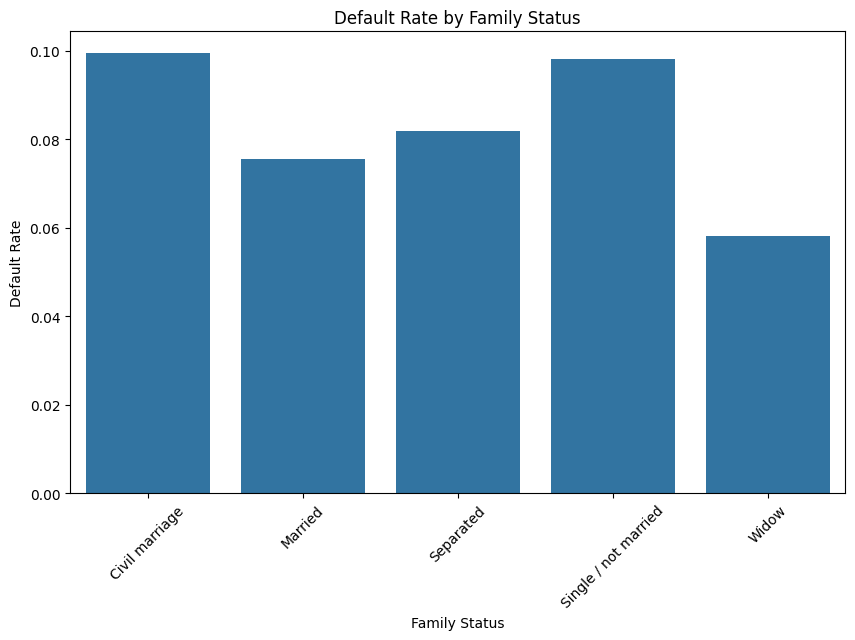

In [6]:
# 1. Distribution of `AMT_CREDIT` across different `AGE_GROUPS`
plt.figure(figsize=(10, 6))
sns.boxplot(data=applications_cleaned, x='AGE_GROUP', y='AMT_CREDIT')
plt.title('Distribution of Credit Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Credit Amount')
plt.xticks(rotation=45)
plt.show()

# 2. Average `YEARS_EMPLOYED` by `AGE_GROUP`
avg_years_employed = applications_cleaned.groupby('AGE_GROUP')['YEARS_EMPLOYED'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_years_employed, x='AGE_GROUP', y='YEARS_EMPLOYED')
plt.title('Average Years Employed by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Years Employed')
plt.xticks(rotation=45)
plt.show()

# 3. Default Rate by Age Group
plt.figure(figsize=(10, 6))
age_target = applications_cleaned.groupby('AGE_GROUP')['TARGET'].mean().reset_index()
sns.barplot(data=age_target, x='AGE_GROUP', y='TARGET')
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')
plt.show()

# 4. Default Rate by Employment Type
plt.figure(figsize=(12, 6))
employment_target = applications_cleaned.groupby('NAME_INCOME_TYPE')['TARGET'].mean().reset_index()
sns.barplot(data=employment_target, x='NAME_INCOME_TYPE', y='TARGET')
plt.title('Default Rate by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()

# 5. Default Rate by Occupation Type
# Calculate the default rate by occupation type
occupation_target = applications_cleaned.groupby('OCCUPATION_TYPE')['TARGET'].mean().reset_index()

# Plot the default rate by occupation type
plt.figure(figsize=(12, 6))
sns.barplot(data=occupation_target, x='OCCUPATION_TYPE', y='TARGET')
plt.title('Default Rate by Occupation Type')
plt.xlabel('Occupation Type')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()

# 6. Default Rate by Family Status
# Calculate the default rate by family status
family_status_target = applications_cleaned.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().reset_index()

# Plot the default rate by family status
plt.figure(figsize=(10, 6))
sns.barplot(data=family_status_target, x='NAME_FAMILY_STATUS', y='TARGET')
plt.title('Default Rate by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()

# Modeling


**Step 1:** Data Preparation

Let's encode categorical variables using Label Encoding for simplicity (suitable for models like tree-based methods)
We assume all categorical variables are either object or category type but before that let's drop the numaric values that we segmented before

In [13]:
applications_cleaned.drop(columns=["AGE_YEARS","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY"],inplace=True)
categorical_columns = applications_cleaned.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    le = LabelEncoder()
    applications_cleaned[col] = le.fit_transform(applications_cleaned[col].astype(str))

# Loading dataset (assuming 'data' variable contains the loaded data)
X = applications_cleaned.drop(columns=['TARGET'])
y = applications_cleaned['TARGET']

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))


In [15]:
# Defining dictionary of models with initial parameters
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    # 'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss', random_state=42),
    'CatBoost': CatBoostClassifier(class_weights=[1, 5], verbose=0, random_state=42),
    # 'SVM': SVC(class_weight='balanced', probability=True, random_state=42)
}

# Define hyperparameters for tuning
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    # 'Random Forest': {'n_estimators': [100, 200], 'max_depth': [5, 10, 20]},
    'XGBoost': {'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200], 'max_depth': [3, 6, 10]},
    'CatBoost': {'learning_rate': [0.01, 0.1], 'depth': [4, 6, 10]},
    # 'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return auc, f1, report

In [17]:
# Train and tune models
results = []
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    # Choose between RandomizedSearchCV or GridSearchCV
    search = GridSearchCV(model, param_grids[model_name], scoring='roc_auc', cv=StratifiedKFold(n_splits=5), n_jobs=-1)
    search.fit(X_train_scaled, y_train)

    # Get best model and evaluate
    best_model = search.best_estimator_
    auc, f1, report = evaluate_model(best_model, X_test_scaled, y_test)

    # Store results
    results.append({'Model': model_name, 'AUC-ROC': auc, 'F1 Score': f1, 'Best Params': search.best_params_})
    print(f"Best Params: {search.best_params_}")
    print(f"AUC-ROC: {auc:.4f}, F1 Score: {f1:.4f}")
    print(report)


Training Logistic Regression...
Best Params: {'C': 0.01}
AUC-ROC: 0.7382, F1 Score: 0.2535
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     84805
           1       0.16      0.67      0.25      7448

    accuracy                           0.68     92253
   macro avg       0.56      0.68      0.52     92253
weighted avg       0.89      0.68      0.75     92253


Training XGBoost...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:25:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:25:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:25:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:25:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
AUC-ROC: 0.7494, F1 Score: 0.0203
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84805
           1       0.61      0.01      0.02      7448

    accuracy                           0.92     92253
   macro avg       0.77      0.50      0.49     92253
weighted avg       0.90      0.92      0.88     92253


Training CatBoost...
Best Params: {'depth': 6, 'learning_rate': 0.01}
AUC-ROC: 0.7487, F1 Score: 0.2889
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     84805
           1       0.26      0.33      0.29      7448

    accuracy                           0.87     92253
   macro avg       0.60      0.62      0.61     92253
weighted avg       0.88      0.87      0.88     92253




Model Performance Comparison:
                 Model   AUC-ROC  F1 Score  \
1              XGBoost  0.749411  0.020333   
2             CatBoost  0.748709  0.288892   
0  Logistic Regression  0.738166  0.253495   

                                         Best Params  
1  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  
2                {'depth': 6, 'learning_rate': 0.01}  
0                                        {'C': 0.01}  


/var/folders/m3/z_nzym2905x4qzympqy0h6580000gn/T/ipykernel_21820/3035508655.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='AUC-ROC', data=results_df, palette='Blues')


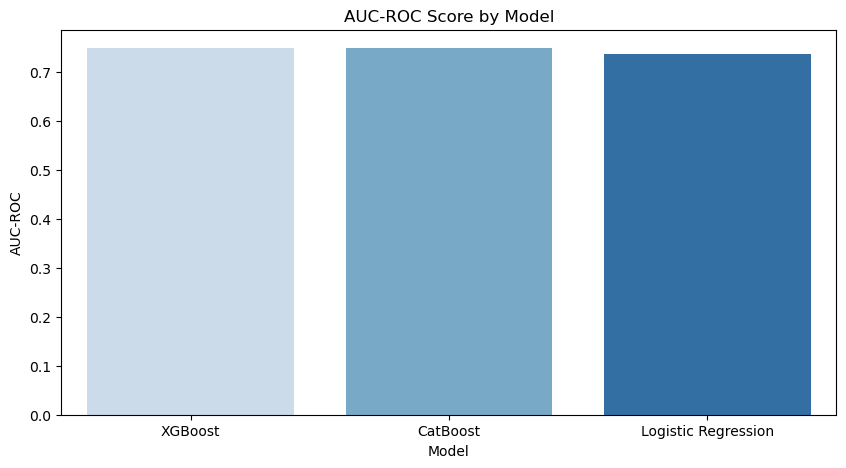

/var/folders/m3/z_nzym2905x4qzympqy0h6580000gn/T/ipykernel_21820/3035508655.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1 Score', data=results_df, palette='Greens')


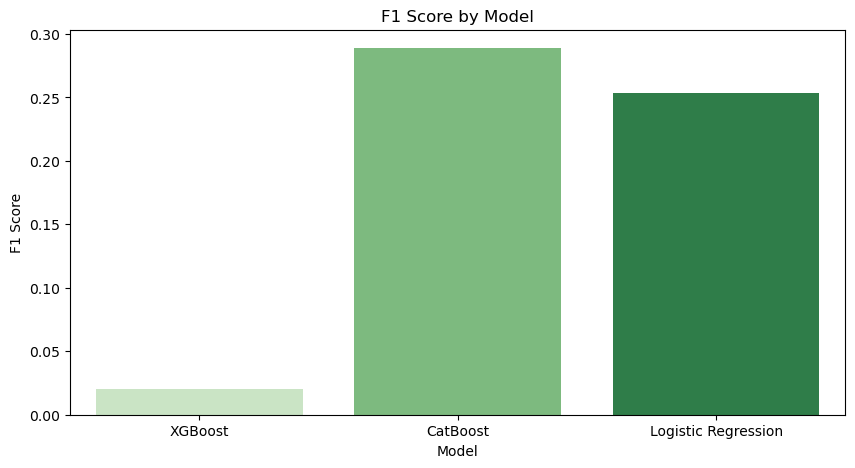

In [19]:
# Display results
results_df = pd.DataFrame(results).sort_values(by='AUC-ROC', ascending=False)
print("\nModel Performance Comparison:")
print(results_df)

# Visualize AUC-ROC and F1 scores
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='AUC-ROC', data=results_df, palette='Blues')
plt.title('AUC-ROC Score by Model')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='F1 Score', data=results_df, palette='Greens')
plt.title('F1 Score by Model')
plt.show()